In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=200

# Pattern classification

### Labeled data

A labeled dataset is a collection of feature vectors and their associated labels.  To demonstrate this concept, we will load the **iris dataset**.
This is a famous dataset collected by statistician and biologist Ronald Fisher in 1936 This dataset even has its own [wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The data contains measurments that describe three types of iris flowers
Iris setosa, Iris virginica, and Iris versicolor:

<img style="padding: 10px; float:left;" alt="Iris setosa in public domain" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Iris_setosa.JPG" width="150">
<img style="padding: 10px; float:left;" alt="Iris versicolor Danielle Langlois CC BY-SA 3.0" src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" width="150">
<img style="padding: 10px; float:left;" alt="Iris virginica by Frank Mayfield CC BY-SA 2.0" src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" width="150">



In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

In [4]:
print (X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


We can also obtain the names of the features:

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(y[:5])

[0 0 0 0 0]


The class labels are mapped to integers, and we can obtain the original class names:

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

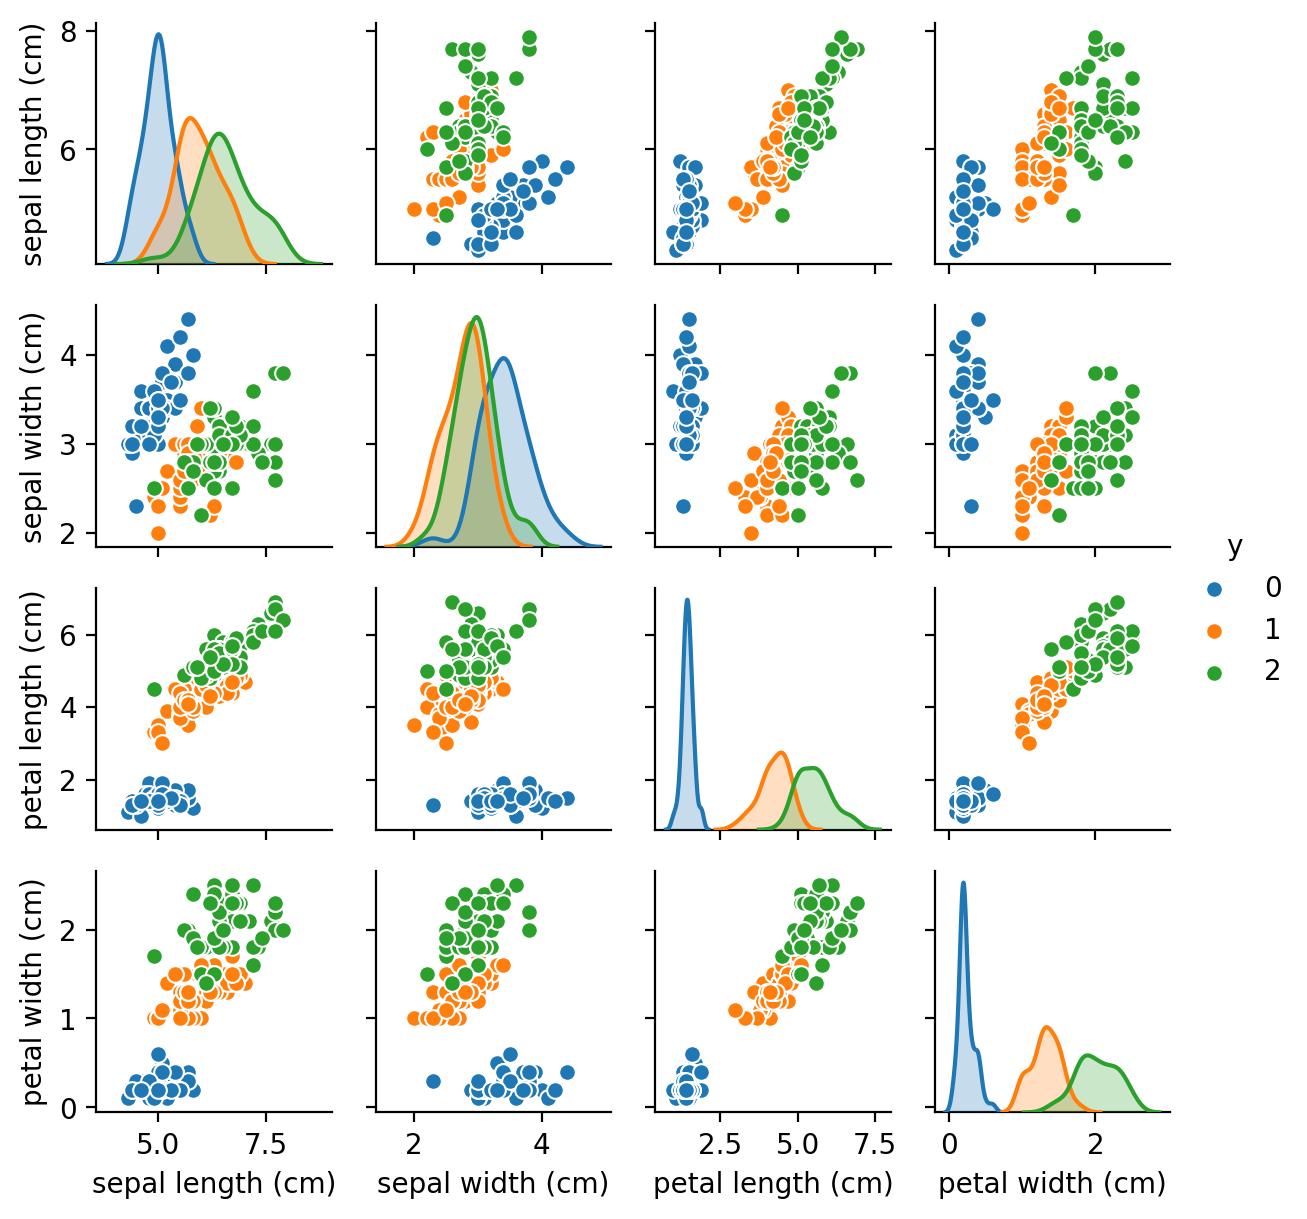

In [8]:
import seaborn as sns
import pandas as pd
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['y'] = iris.target
sns.pairplot(iris_df, hue='y', height=1.5);

### Reflections:

* What can you learn about the data from the above figure?  Which features are most informative for the classification of iris species?  Are petal measurments more relevant than information on sepal leaves?

Let us now define a labeled dataset more formally:

$$
\mathcal{D} = \{ \;(\mathbf{x}_i, y_i) \; \}_{i=1}^N
$$

where $\mathbf{x}_i \in \mathbb{R}^d$ and $y_i$ is the label associated with $\mathbf{x}_i$.
$\mathbb{R}^d$ is the set of all $d$-dimensional vectors with entries that are real numbers.

For classification problems the labels are a discrete set, e.g. $\{0, 1 \}$ for a binary classification problem.

In practice, we will represent the collection of feature vectors as a matrix $X$, where row $i$ of $X$ is equal to $\mathbf{x}_i$.  In other words $X$ is an $N \times d$ matrix.


**Objective**:  train a classifier that will accurately predict the class label $y$ of an object given features $\mathbf{x}$ that characterize it.

In [21]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=0.4, random_state=1)

In [22]:
X.shape, y.shape

((100, 2), (100,))

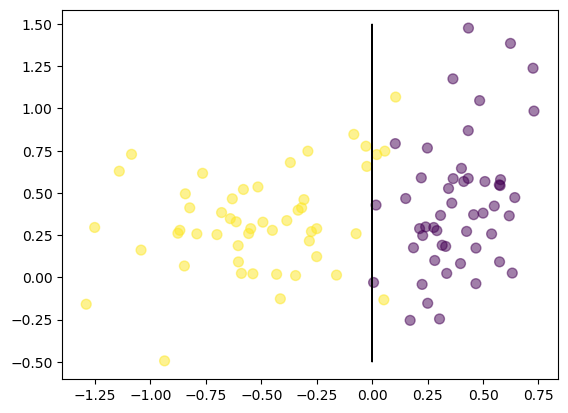

In [25]:
#plt.style.use('default')
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=50);
plt.arrow(0,-0.5,0,2, width=0.001, length_includes_head=True, alpha=1,linestyle='-',color='k');


Looking at this data, we might conclude that a good classification rule would be based on the value of the first feature, and whether it is larger than some threshold (say 0).  However:

* This threshold was chosen on a specific dataset.  How well do we expect it to perform on new data?
* How to algorithmically decide on a rule that is expected to perform well?

This is exactly what we will do in this course:  *design algorithms that generalize well to unseen data, and determine how close we are to this goal*.

### Other machine learning problems

<img style="padding: 10px; float:right;" alt="linear regression in public domain" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="250">

* Classification:  discrete/categorical labels
* Regression:  continuous labels
* Clustering:  no labels 

Classification and regression are forms of *supervised learning*, where we learn to predict a desired output on the basis of labeled examples.
Clustering is an example of *unsupervised learning*.  Unsupervised learning is often a preliminary step before applying supervised learning, where we create an internal representation of the input e.g. form clusters; extract features etc.


### What kinds of problems are amenable for a machine learning solution?

* Should an applicant be approved for credit or a loan?  Potential features:  salary, age, years in current job, zip-code, ...

Which of the following problems are suited for machine learning?
 
* Classifying numbers into primes and non-primes. 
* Predicting the time it would take a falling object to hit the ground. 
* Determining the optimal cycle for traffic lights in a busy intersection. 
* Medical diagnosis
